In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 행(row) 다 보기
pd.set_option('display.max_rows', None)

# 열(column) 다 보기
pd.set_option('display.max_columns', None)

In [9]:
tickers = ["360750.KS", "148070.KS", "195980.KS", "272580.KS", "294400.KS", "305080.KS", "352560.KS", "411060.KS"]
dict_tickers = {"360750.KS":"S&P500", "148070.KS":"한국채10년", "195980.KS":"MSCI", "272580.KS":"단기채권",
                "294400.KS":"키움200TR", "305080.KS":"미국채10년", "352560.KS":"US리츠", "411060.KS":"금"}
data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
data.columns = [ dict_tickers[col] for col in data.columns]

/var/folders/jk/1j1mgc7x11122bdp64mnjcf40000gp/T/ipykernel_8354/2482937315.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
[*********************100%***********************]  8 of 8 completed


In [10]:
data = data.dropna()
data.head()

,한국채10년,MSCI,단기채권,키움200TR,미국채10년,US리츠,S&P500,금
Date,,,,,,,,
2024-06-19,109891.578125,9845.0,54045.0,48580.0,12115.0,10738.643555,18642.539062,14770.0
2024-06-20,109630.804688,9895.0,54060.0,48790.0,12125.0,10733.905273,18736.095703,14875.0
2024-06-21,109669.437500,9850.0,54065.0,48335.0,12145.0,10733.905273,18696.703125,15000.0
2024-06-24,109698.414062,9775.0,54065.0,48005.0,12160.0,10752.863281,18667.158203,14845.0
2024-06-25,109654.953125,9875.0,54080.0,48155.0,12150.0,10861.859375,18593.296875,14870.0


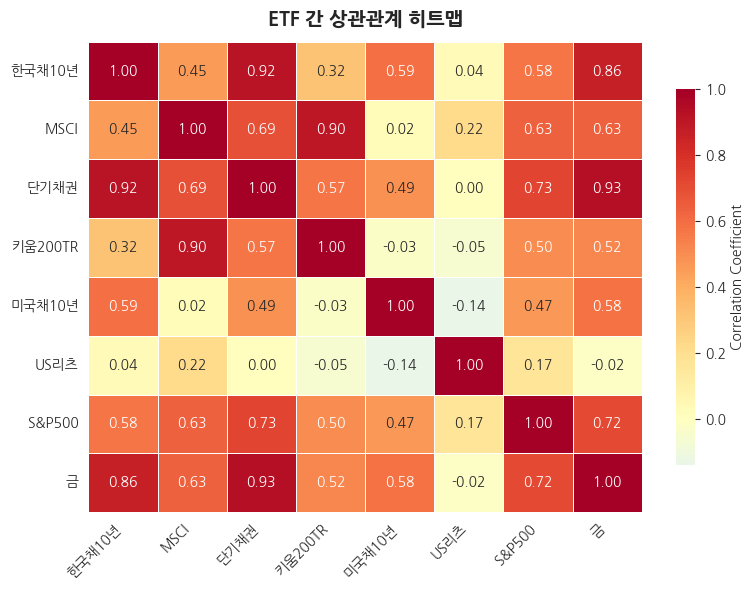

In [11]:
corr = data.corr()
# 히트맵 스타일 설정
plt.figure(figsize=(8,6))
#sns.set_theme(style="white")

# 색상맵과 폰트, 라벨 등 스타일링
sns.heatmap(
    corr,
    annot=True,              # 숫자 표시
    fmt=".2f",               # 소수점 자리수
    cmap="RdYlBu_r",         # 예쁜 색상맵
    center=0,                # 0 기준 색상 구분
    linewidths=0.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}
)

plt.title("ETF 간 상관관계 히트맵", fontsize=14, pad=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🧭 시기적 배경 (2024년 중반~2025년 하반기)
- 미국 금리 고점 유지 → 인하 기대 확산
- 원화 약세 / 달러 강세
- 에너지·원자재 가격 반등
- 주식시장(특히 AI·미국 중심) 강세
- 채권 수익률은 하락(가격 상승)
- 즉, “완전한 긴축→완화 전환기”에 있는 시점이죠.

🧩 ETF 간 상관관계, 이 시점에 맞춘 해석

- 한국채권·단기채권·금 → 거의 같은 움직임
    + 상관 0.9 이상 → “금리 인하 기대” 시 동반 상승
	+ 즉, ‘위험 회피 자산’이라기보단 ‘정책금리 하락 기대’ 자산군
	+ 특히 금은 인플레이션 완화 국면에서 실질금리 하락에 민감하게 반응 → 채권과 유사한 방향으로 움직임
---

- 한국주식(KOSPI200), MSCI, S&P500 → 완전한 글로벌 동조화
	+ MSCI–KOSPI200 = 0.90, S&P500–MSCI = 0.63
	+ 미국발 기술주 랠리와 AI 붐,
    + 원화 약세로 수출주 강세 → 한국 시장 동반 상승.
	    + 따라서 이 시기에는 “국가 분산” 의미가 거의 없습니다.(미국 주식과 한국 주식이 거의 동일하게 움직임)
---

- 미국채10년 → 진짜 분산자산
	+ 주식형 ETF들과 상관 거의 0에 가까움, 일부는 음(-)
        + 이 구간에서도 미국채는 “경기둔화/위험회피 시 상승” 패턴 유지.
	+ 즉, 포트폴리오 변동성 완화에 가장 효과적.
---

- US리츠 → 약한 독립성 유지
	+ 모든 자산과 상관 0.0~0.2 수준
    + 금리 인하 기대가 있지만 상업용 부동산 리스크가 커
    + 시장 전체와 동조하지 못함.
	    + 여전히 분산효과 보유.

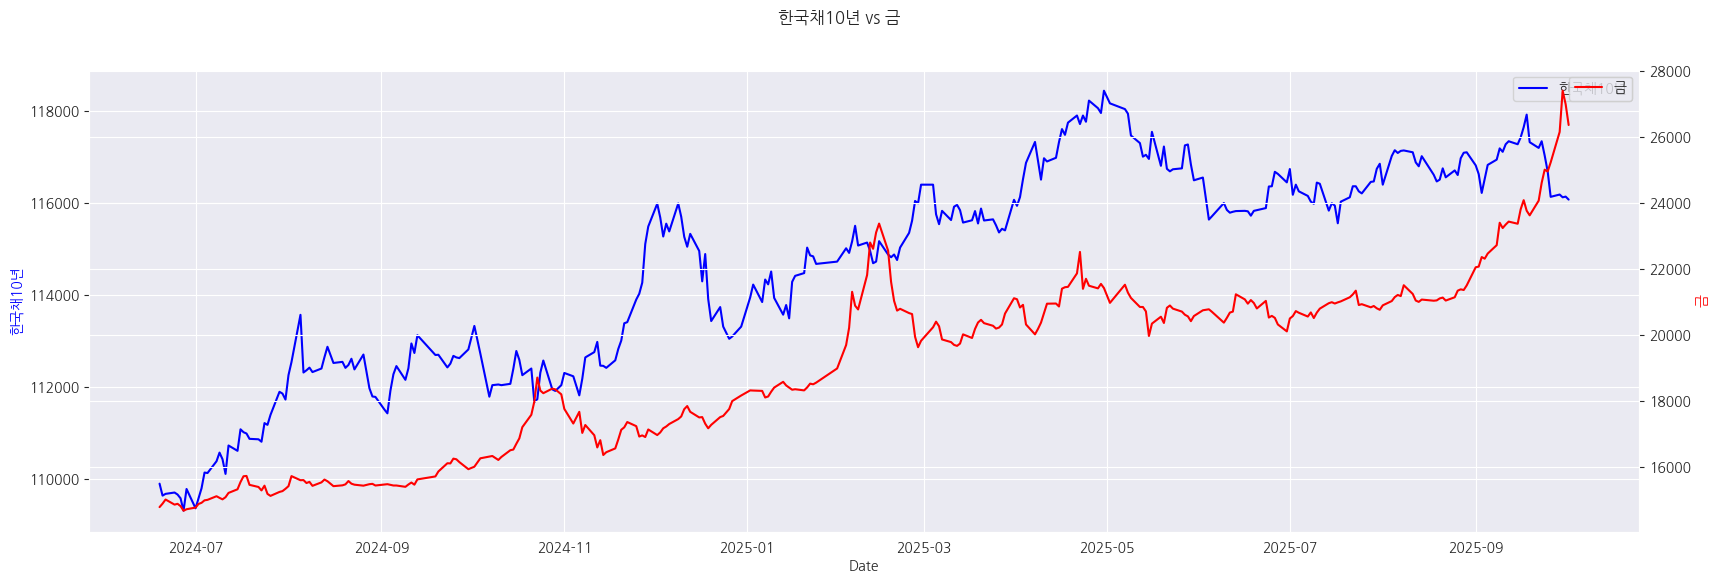

In [12]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.lineplot(x=data.index, y=data["한국채10년"], ax=ax1, label="한국채10년", color='blue')
ax1.set_ylabel('한국채10년', color='blue')

ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data["금"], ax=ax2, label="금", color='red')
ax2.set_ylabel('금', color='red')

fig.suptitle('한국채10년 vs 금')
plt.show()

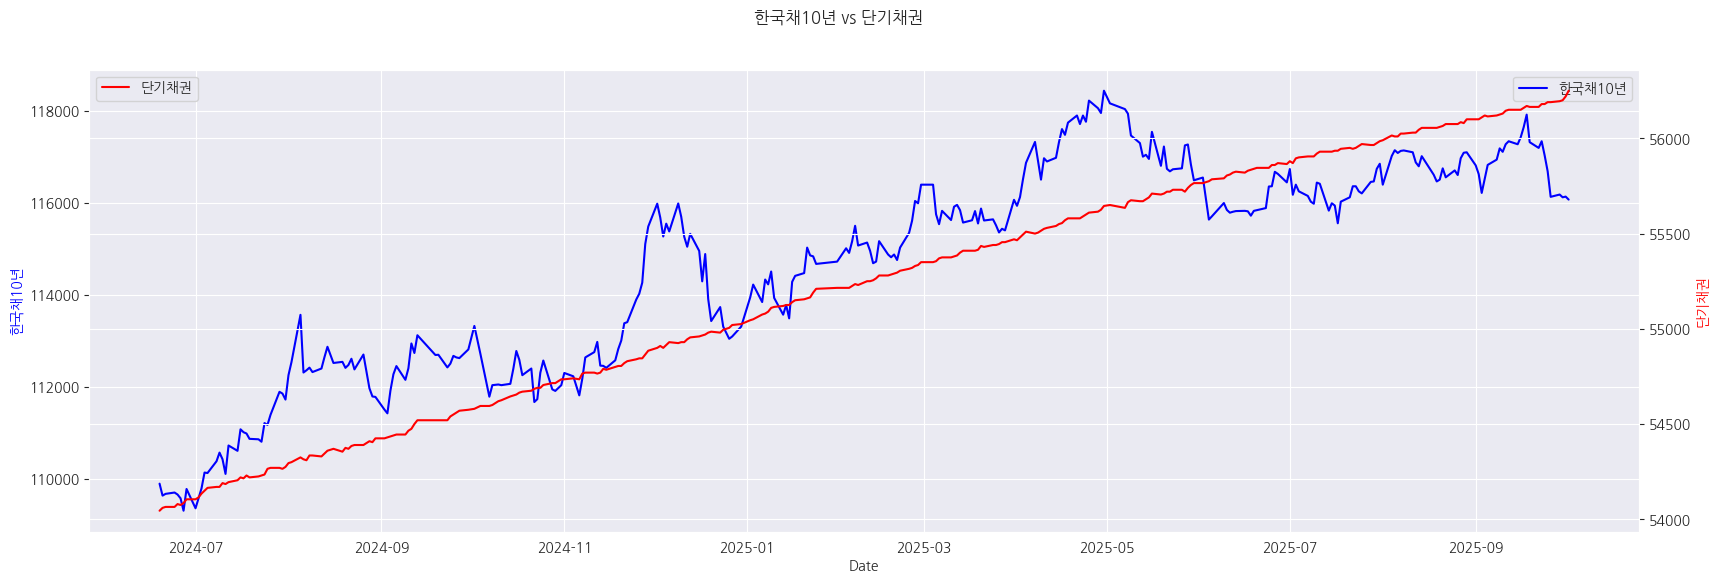

In [6]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.lineplot(x=data.index, y=data["한국채10년"], ax=ax1, label="한국채10년", color='blue')
ax1.set_ylabel('한국채10년', color='blue')

ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data["단기채권"], ax=ax2, label="단기채권", color='red')
ax2.set_ylabel('단기채권', color='red')

fig.suptitle('한국채10년 vs 단기채권')
plt.show()

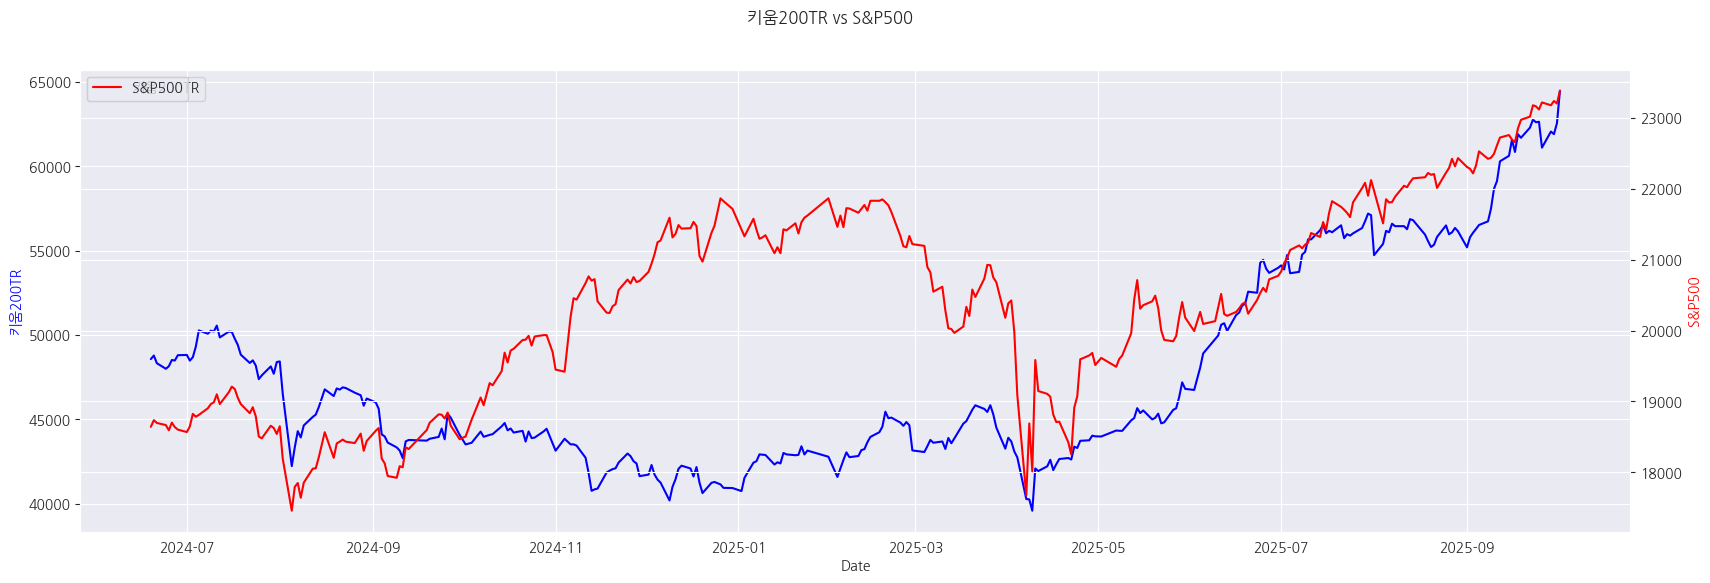

In [7]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.lineplot(x=data.index, y=data["키움200TR"], ax=ax1, label="키움200TR", color='blue')
ax1.set_ylabel('키움200TR', color='blue')

ax2 = ax1.twinx()
sns.lineplot(x=data.index, y=data["S&P500"], ax=ax2, label="S&P500", color='red')
ax2.set_ylabel('S&P500', color='red')

fig.suptitle('키움200TR vs S&P500')
plt.show()

## 포트폴리오 비중화 최적화

### **연금저축연금**

In [13]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize


# -----------------------------
# 2. 일간 수익률 계산
# -----------------------------
# 1️⃣ 수익률 행렬 (df_returns): 각 ETF의 월별 수익률 (%)
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()
mu = df_log_return.mean()

# -----------------------------
# 3. 공분산 행렬 계산
# -----------------------------
cov_matrix = df_log_return.cov()


# -----------------------------
# 4. 최소변동성 포트폴리오 (숏 제한)
# -----------------------------
num_assets = len(df_log_return.columns)
ones = np.ones(num_assets)

def portfolio_vol(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

#	\Sigma에는
#   → 각 자산의 자기 리스크(분산) + 서로 간의 움직임(공분산)이 다 들어 있어요.
#	w에는 “얼마나 투자했는지(비중)” 정보가 들어 있고요.

#   따라서 w^T \Sigma w는 “각 자산의 리스크(분산)”와 “서로의 관계(공분산)”를
#   비중 w만큼 곱해서 전체로 얼마나 위험이 합쳐지는지를 계산한 값이에요.

# 제약조건: 합 = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# 자산별 최소/최대 비중 설정
min_weights = [0.2, 0.05, 0.075, 0.05, 0.075, 0.05, 0.05, 0.05]  # 한국채10년, MSCI, ...
max_weights = [0.3, 0.15, 0.175, 0.15, 0.175, 0.15, 0.15, 0.15]

dict_tickers = {"360750.KS":"S&P500", "148070.KS":"한국채10년", "195980.KS":"MSCI", "272580.KS":"단기채권",
                "294400.KS":"키움200TR", "305080.KS":"미국채10년", "352560.KS":"US리츠", "411060.KS":"금"}
# KIWOOM 국고채 10년		10.0%
# PLUS 신흥국MSCI(합성 H)  12.5%
# 타이거 단기채권엑티브		10.0%
# 타이거 미국채 10년선물		10.0%
# 타이거 미국 S&P500		25.0%
# ACE KRX 금현물		    10.0%
# KIWOOM 200TR		    12.5%
# KODEX 미국부동산리츠(H)	10.0%


bounds = tuple((min_w, max_w) for min_w, max_w in zip(min_weights, max_weights))

# 초기값: 각 최소값 + 남은 균등 배분
initial_guess = np.array(min_weights)
remaining = 1 - sum(min_weights)
initial_guess += remaining / num_assets

result = minimize(portfolio_vol, initial_guess, args=(cov_matrix,),
                  method='SLSQP', bounds=bounds, constraints=constraints)

weights_custom_limits = result.x

print("===== 최소변동성 포트폴리오 (자산별 다르게 제한) =====")
display(pd.Series(weights_custom_limits*100, index=df_log_return.columns))
print("합계:", weights_custom_limits.sum())

===== 최소변동성 포트폴리오 (자산별 다르게 제한) =====


한국채10년     30.000000
MSCI        5.595883
단기채권       20.000000
키움200TR     7.500000
미국채10년     17.500000
US리츠        5.000000
S&P500      5.000000
금           9.404117
dtype: float64

합계: 1.0


In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# ✅ 예시: 수익률 데이터프레임 (사용자 데이터로 대체 가능)
# df = 가격 데이터 (columns = 자산명)
# 수익률로 변환
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()

# 공분산 행렬 & 평균 수익률
cov_matrix = df_log_return.cov().values
mean_returns = df_log_return.mean().values

# 무위험 수익률
risk_free_rate = 0.035 / 252  # 일단위로 변환 (연 2% 가정) 252일이 보통 1년 내 거래일이기 때문

# 포트폴리오 변동성 함수
def portfolio_vol(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

# 포트폴리오 기대수익
def portfolio_return(weights, mean_returns):
    return np.sum(weights * mean_returns)

# 샤프비율 (최대화가 목표)
# 변동성(σ)은 “수익률이 얼마나 요동치는가” 즉, 위험(risk) 을 의미합니다.
# 따라서,
#	•	분자는 “얼마나 수익을 냈는가”
#	•	분모는 “그 수익을 내기 위해 얼마나 위험을 감수했는가”
# 즉,
# 단위 위험당 얼마의 초과 수익을 냈는가를 측정하는 지표가 바로 샤프비율입니다.
# **변동성이 낮으면서 샤프비율이 높은 것이 가장 좋은 지표**
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, mean_returns)
    port_vol = portfolio_vol(weights, cov_matrix)
    sharpe = (port_return - risk_free_rate) / port_vol
    return -sharpe  # minimize()는 최소화하므로 부호 반전

# 제약조건 (비중합 = 1)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 비중 범위 (숏 제한)
# 자산별 최소/최대 비중 설정
min_weights = [0.2, 0.05, 0.075, 0.05, 0.075, 0.05, 0.05, 0.05]  # 한국채10년, MSCI, ...
max_weights = [0.3, 0.15, 0.175, 0.15, 0.175, 0.15, 0.15, 0.15]
# min_weights = [0.25, 0.1, 0.125, 0.1, 0.125, 0.1, 0.1, 0.1] # 한국채10년, MSCI, ...
# max_weights = [0.25, 0.1, 0.125, 0.1, 0.125, 0.1, 0.1, 0.1]
# min_weights = [0]*8  # 한국채10년, MSCI, ...
# max_weights = [1]*8
# bounds = tuple((0, 1) for _ in range(len(mean_returns)))
bounds = tuple((min_w, max_w) for min_w, max_w in zip(min_weights, max_weights))

# 초기값
initial_guess = np.repeat(1/len(mean_returns), len(mean_returns))

# 최적화
result = minimize(
    neg_sharpe_ratio,
    initial_guess,
    args=(mean_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 결과 출력
weights_opt = pd.Series(result.x, index=dict_tickers.values())
port_return = portfolio_return(result.x, mean_returns)
port_vol = portfolio_vol(result.x, cov_matrix)
sharpe = (port_return - risk_free_rate) / port_vol

print("===== 샤프비율 최대 포트폴리오 =====")
print(weights_opt*100)
print(f"\n기대수익률: {port_return*252:.2%}") ## 일단위를 연평균수익로 변경
print(f"변동성: {port_vol*np.sqrt(252):.2%}")
print(f"샤프비율: {sharpe*np.sqrt(252):.3f}")

===== 샤프비율 최대 포트폴리오 =====
S&P500     30.000000
한국채10년      5.000000
MSCI       17.500000
단기채권        8.524422
키움200TR    13.975578
미국채10년      5.000000
US리츠        5.000000
금          15.000000
dtype: float64

기대수익률: 13.71%
변동성: 5.00%
샤프비율: 2.041


In [24]:
import pandas as pd
import numpy as np

# 예시: etf별 일일 수익률
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()

dict_tickers = {"360750.KS":"S&P500", "148070.KS":"한국채10년", "195980.KS":"MSCI", "272580.KS":"단기채권",
                "294400.KS":"키움200TR", "305080.KS":"미국채10년", "352560.KS":"US리츠", "411060.KS":"금"}
# KIWOOM 국고채 10년		10.0%
# PLUS 신흥국MSCI(합성 H)  12.5%
# 타이거 단기채권엑티브		10.0%
# 타이거 미국채 10년선물		10.0%
# 타이거 미국 S&P500		25.0%
# ACE KRX 금현물		    10.0%
# KIWOOM 200TR		    12.5%
# KODEX 미국부동산리츠(H)	10.0%


# 포트폴리오 1 (중립형)
w1 = np.array([0.25, 0.1, 0.125, 0.1, 0.125, 0.1, 0.1, 0.1])


# 포트폴리오 2 (샤프형)
w2 = np.array([0.3, 0.05, 0.175, 0.085, 0.14, 0.05, 0.05, 0.15])

# 각 포트폴리오의 일자별 수익률 계산
p1_returns = df_log_return.dot(w1)
p2_returns = df_log_return.dot(w2)

# 두 포트폴리오 간 상관계수
corr = np.corrcoef(p1_returns, p2_returns)[0, 1]
print("두 포트폴리오 상관계수:", corr)

두 포트폴리오 상관계수: 0.9103261820685408


In [26]:
import numpy as np

def optimal_mix_portfolio(
    ret1, vol1, ret2, vol2, corr, rf=0.035, period=1
):
    """
    두 포트폴리오(예: 중립형, 샤프형)를 혼합할 때
    샤프비율이 최대가 되는 비중을 계산

    Parameters:
        ret1, ret2: 각 포트폴리오의 기대수익률 (% 단위 X, 비율 단위)
        vol1, vol2: 각 포트폴리오의 변동성
        corr: 두 포트폴리오 간 상관계수
        rf: 무위험 수익률 (default 0.035)
        period: 연환산 기간 (ex. 12개월 or 252일 등)

    Returns:
        w_opt: 포트폴리오2(샤프형)의 최적 비중
        ret_opt, vol_opt, sharpe_opt: 혼합포트폴리오의 성과
    """

    cov = corr * vol1 * vol2  # 공분산

    # 샤프비율을 최대화하는 비중 w (포트폴리오2의 비중)
    w_opt = ((ret2 - rf) * (vol1**2 - cov) - (ret1 - rf) * (cov - vol2**2)) / (
        (ret2 - rf) * (vol1**2 + vol2**2 - 2 * cov)
    )

    # 0~1 범위로 제한
    w_opt = np.clip(w_opt, 0, 1)

    # 혼합 포트폴리오 성과 계산
    ret_opt = w_opt * ret2 + (1 - w_opt) * ret1
    vol_opt = np.sqrt(
        (w_opt**2) * vol2**2 + ((1 - w_opt)**2) * vol1**2 + 2 * w_opt * (1 - w_opt) * cov
    )
    sharpe_opt = (ret_opt - rf) / vol_opt

    return w_opt, ret_opt, vol_opt, sharpe_opt


# === 예시 입력 (네가 준 값 기준) ===
ret1, vol1 = 0.1349, 0.064   # 중립형
ret2, vol2 = 0.1371, 0.05    # 샤프형
corr = 0.91                  # 두 포트폴리오 간 상관관계 (추정치)
rf = 0.035                    # 무위험수익률

w_opt, ret_opt, vol_opt, sharpe_opt = optimal_mix_portfolio(
    ret1, vol1, ret2, vol2, corr, rf
)

print(f"샤프형 비중: {w_opt*100:.1f}%")
print(f"기대수익률: {ret_opt*100:.2f}%")
print(f"변동성: {vol_opt*100:.2f}%")
print(f"샤프비율: {sharpe_opt:.3f}")

샤프형 비중: 100.0%
기대수익률: 13.71%
변동성: 5.00%
샤프비율: 2.042


In [13]:
import numpy as np
import pandas as pd
import itertools

# df_return : 8개 ETF 일간 수익률 데이터프레임
returns = np.log(data / data.shift(1))
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.035  # 연 3.5% 가정

# step 0.1, 가능한 비중 값
weights_space = np.arange(0.05, 1.01, 0.1)


# 8자산 가능한 모든 조합
all_combinations = list(itertools.product(weights_space, repeat=8))

# # 합이 1인 조합만 필터
valid_combinations = [w for w in all_combinations if np.isclose(sum(w), 1)]
print(f"총 유효 조합 수: {len(valid_combinations)}")  # 확인

results = []

for w in valid_combinations:
    w = np.array(w)
    port_return = np.dot(w, mean_returns)
    port_vol = np.sqrt(w.T @ cov_matrix @ w)
    sharpe = (port_return - risk_free_rate) / port_vol
    results.append({
        'weights': w,
        'return': port_return,
        'vol': port_vol,
        'sharpe': sharpe
    })

# 데이터프레임으로 정리
df_results = pd.DataFrame(results)

# 샤프 최대 포트폴리오
best_idx = df_results['sharpe'].idxmax()
best_port = df_results.loc[best_idx]

print("===== Grid Search 최적 샤프 포트폴리오 =====")
print(f"샤프비율: {best_port['sharpe']:.3f}")
print(f"기대수익률: {best_port['return']*100:.2f}%")
print(f"변동성: {best_port['vol']*100:.2f}%")
print(f"포트폴리오 비중: {best_port['weights']}")

총 유효 조합 수: 1716
===== Grid Search 최적 샤프 포트폴리오 =====
샤프비율: 2.258
기대수익률: 27.76%
변동성: 10.74%
포트폴리오 비중: [0.15 0.05 0.05 0.15 0.05 0.05 0.05 0.45]


In [32]:
for idx, col in enumerate(df_log_return.columns):
    df_results[col] = df_results['weights'].apply(lambda x: x[idx])

df_results[(df_results['sharpe'] > 2) & (df_results['return'] > 0.2)].sort_values(by=['sharpe', 'return'], ascending=False).head(20)

,weights,return,vol,sharpe,한국채10년,MSCI,단기채권,키움200TR,미국채10년,US리츠,S&P500,금
980,"[0.15000000000000002, 0.05, 0.05, 0.1500000000...",0.277614,0.107441,2.258106,0.15,0.05,0.05,0.15,0.05,0.05,0.05,0.45
1421,"[0.25000000000000006, 0.05, 0.05, 0.1500000000...",0.235250,0.088881,2.253016,0.25,0.05,0.05,0.15,0.05,0.05,0.05,0.35
995,"[0.15000000000000002, 0.05, 0.05, 0.1500000000...",0.235271,0.089117,2.247284,0.15,0.05,0.05,0.15,0.15,0.05,0.05,0.35
105,"[0.05, 0.05, 0.05, 0.15000000000000002, 0.1500...",0.277635,0.108067,2.245239,0.05,0.05,0.05,0.15,0.15,0.05,0.05,0.45
266,"[0.05, 0.05, 0.15000000000000002, 0.1500000000...",0.276423,0.107657,2.242515,0.05,0.05,0.15,0.15,0.05,0.05,0.05,0.45
84,"[0.05, 0.05, 0.05, 0.15000000000000002, 0.05, ...",0.319978,0.127190,2.240567,0.05,0.05,0.05,0.15,0.05,0.05,0.05,0.55
1085,"[0.15000000000000002, 0.05, 0.1500000000000000...",0.234059,0.088847,2.240458,0.15,0.05,0.15,0.15,0.05,0.05,0.05,0.35
281,"[0.05, 0.05, 0.15000000000000002, 0.1500000000...",0.234079,0.089198,2.231875,0.05,0.05,0.15,0.15,0.15,0.05,0.05,0.35
140,"[0.05, 0.05, 0.05, 0.25000000000000006, 0.05, ...",0.296075,0.117465,2.222569,0.05,0.05,0.05,0.25,0.05,0.05,0.05,0.45
371,"[0.05, 0.05, 0.25000000000000006, 0.1500000000...",0.232867,0.089037,2.222296,0.05,0.05,0.25,0.15,0.05,0.05,0.05,0.35


### **IRP**

In [27]:
dict_tickers = {"294400.KS":"키움200TR", "148070.KS":"한국채10년", "272580.KS":"단기채권", "195980.KS":"MSCI", "360750.KS":"S&P500",
                "284430.KS":"KODEX미국채혼합", "411060.KS":"금", "352560.KS":"US리츠", "490490.KS":"미국배당미국채혼합"}
tickers = list(dict_tickers.keys())

data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
data.columns = [ dict_tickers[col] for col in data.columns]
data.head()

/var/folders/jk/1j1mgc7x11122bdp64mnjcf40000gp/T/ipykernel_8354/3110100891.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
[*********************100%***********************]  9 of 9 completed


,한국채10년,MSCI,단기채권,KODEX미국채혼합,키움200TR,US리츠,S&P500,금,미국배당미국채혼합
Date,,,,,,,,,
2020-01-02,112096.523438,11160.0,49495.503906,10811.165039,33615.0,NaN,NaN,NaN,NaN
2020-01-03,112773.906250,11345.0,49505.398438,10880.850586,33620.0,NaN,NaN,NaN,NaN
2020-01-06,113073.968750,11185.0,49505.398438,10920.670898,33385.0,NaN,NaN,NaN,NaN
2020-01-07,112373.843750,11240.0,49515.292969,10910.715820,33710.0,NaN,NaN,NaN,NaN
2020-01-08,112164.718750,11115.0,49515.292969,10920.670898,33500.0,NaN,NaN,NaN,NaN


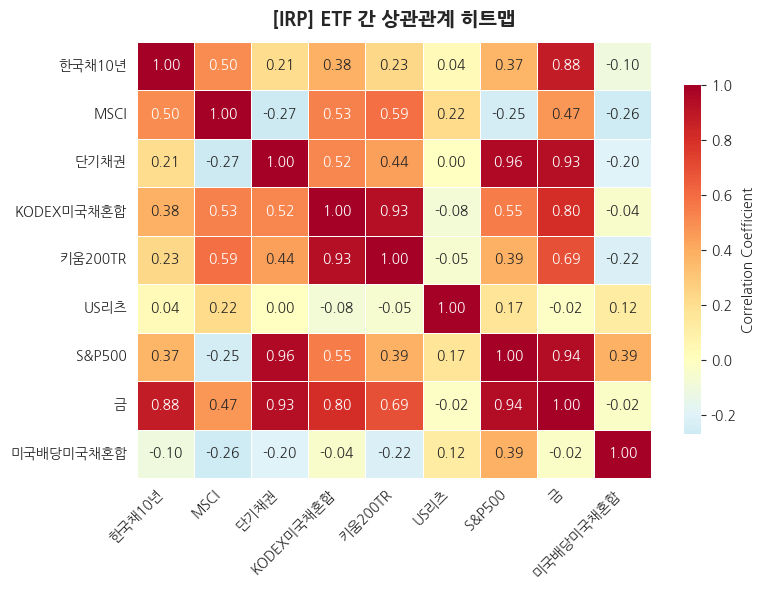

In [28]:
corr = data.corr()
# 히트맵 스타일 설정
plt.figure(figsize=(8,6))
#sns.set_theme(style="white")

# 색상맵과 폰트, 라벨 등 스타일링
sns.heatmap(
    corr,
    annot=True,              # 숫자 표시
    fmt=".2f",               # 소수점 자리수
    cmap="RdYlBu_r",         # 예쁜 색상맵
    center=0,                # 0 기준 색상 구분
    linewidths=0.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}
)

plt.title("[IRP] ETF 간 상관관계 히트맵", fontsize=14, pad=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# ✅ 예시: 수익률 데이터프레임 (사용자 데이터로 대체 가능)
# df = 가격 데이터 (columns = 자산명)
# 수익률로 변환
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()

# 공분산 행렬 & 평균 수익률
cov_matrix = df_log_return.cov().values
mean_returns = df_log_return.mean().values

# 무위험 수익률
risk_free_rate = 0.035 / 252  # 일단위로 변환 (연 2% 가정) 252일이 보통 1년 내 거래일이기 때문

# 포트폴리오 변동성 함수
def portfolio_vol(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

# 포트폴리오 기대수익
def portfolio_return(weights, mean_returns):
    return np.sum(weights * mean_returns)

# 샤프비율 (최대화가 목표)
# 변동성(σ)은 “수익률이 얼마나 요동치는가” 즉, 위험(risk) 을 의미합니다.
# 따라서,
#	•	분자는 “얼마나 수익을 냈는가”
#	•	분모는 “그 수익을 내기 위해 얼마나 위험을 감수했는가”
# 즉,
# 단위 위험당 얼마의 초과 수익을 냈는가를 측정하는 지표가 바로 샤프비율입니다.
# **변동성이 낮으면서 샤프비율이 높은 것이 가장 좋은 지표**
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, mean_returns)
    port_vol = portfolio_vol(weights, cov_matrix)
    sharpe = (port_return - risk_free_rate) / port_vol
    return -sharpe  # minimize()는 최소화하므로 부호 반전

# 제약조건 (비중합 = 1)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 비중 범위 (숏 제한)
# 자산별 최소/최대 비중 설정
# KIWOOM 국고채 10년		17.50% 5.5
# PLUS 신흥국MSCI(합성 H)	6.00%  12.5
# 타이거 미국 S&P500	    9.00%  2.5
# 삼성 KODEX200 미국채혼합	15.0%  11
# SOL 미국배당미국채혼합50	17.0%  10
# ACE KRX 금현물	        7.50%  12.5
# 타이거 단기채권엑티브	    15.00% 20
# KIWOOM 200TR	        5.50%  14
# KODEX 미국부동산리츠(H)	7.50%  12

dict_tickers = {"294400.KS":"키움200TR", "148070.KS":"한국채10년", "272580.KS":"단기채권", "195980.KS":"MSCI", "360750.KS":"S&P500",
                "284430.KS":"KODEX미국채혼합", "411060.KS":"금", "352560.KS":"US리츠", "490490.KS":"미국배당미국채혼합"}
min_weights = [0.005, 0.125, 0.1, 0.01, 0.04, 0.12, 0.025, 0.025, 0.1]  # 한국채10년, MSCI, ...
max_weights = [0.11, 0.225, 0.2, 0.11, 0.14, 0.22, 0.125, 0.125, 0.2]
# min_weights = [0]*9  # 한국채10년, MSCI, ...
# max_weights = [1]*9
# bounds = tuple((0, 1) for _ in range(len(mean_returns)))
bounds = tuple((min_w, max_w) for min_w, max_w in zip(min_weights, max_weights))

# 초기값
initial_guess = np.repeat(1/len(mean_returns), len(mean_returns))

# 최적화
result = minimize(
    neg_sharpe_ratio,
    initial_guess,
    args=(mean_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 결과 출력
weights_opt = pd.Series(result.x, index=["한국채10년", "MSCI", "단기채권", "KODEX미국채혼합", "키움200TR", "US리츠",	"S&P500", "금", "미국배당미국채혼합"])
port_return = portfolio_return(result.x, mean_returns)
port_vol = portfolio_vol(result.x, cov_matrix)
sharpe = (port_return - risk_free_rate) / port_vol

print("===== 샤프비율 최대 포트폴리오 =====")
print(weights_opt*100)
print(f"\n기대수익률: {port_return*252:.2%}") ## 일단위를 연평균수익로 변경
print(f"변동성: {port_vol*np.sqrt(252):.2%}")
print(f"샤프비율: {sharpe*np.sqrt(252):.3f}")

===== 샤프비율 최대 포트폴리오 =====
한국채10년         5.5
MSCI          12.5
단기채권          20.0
KODEX미국채혼합    11.0
키움200TR       14.0
US리츠          12.0
S&P500         2.5
금             12.5
미국배당미국채혼합     10.0
dtype: float64

기대수익률: 17.26%
변동성: 8.03%
샤프비율: 1.713


In [ ]:
import numpy as np
import pandas as pd
import itertools

# df_return : 8개 ETF 일간 수익률 데이터프레임
returns = np.log(data / data.shift(1))
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
risk_free_rate = 0.035  # 연 3.5% 가정

# step 0.1, 가능한 비중 값
weights_space = np.arange(0.1, 1.01, 0.1)


# 8자산 가능한 모든 조합
all_combinations = list(itertools.product(weights_space, repeat=9))

# # 합이 1인 조합만 필터
valid_combinations = [w for w in all_combinations if np.isclose(sum(w), 1)]
print(f"총 유효 조합 수: {len(valid_combinations)}")  # 확인

results = []

for w in valid_combinations:
    w = np.array(w)
    port_return = np.dot(w, mean_returns)
    port_vol = np.sqrt(w.T @ cov_matrix @ w)
    sharpe = (port_return - risk_free_rate) / port_vol
    results.append({
        'weights': w,
        'return': port_return,
        'vol': port_vol,
        'sharpe': sharpe
    })

# 데이터프레임으로 정리
df_results = pd.DataFrame(results)

# 샤프 최대 포트폴리오
best_idx = df_results['sharpe'].idxmax()
best_port = df_results.loc[best_idx]

print("===== Grid Search 최적 샤프 포트폴리오 =====")
print(f"샤프비율: {best_port['sharpe']:.3f}")
print(f"기대수익률: {best_port['return']*100:.2f}%")
print(f"변동성: {best_port['vol']*100:.2f}%")
print(f"포트폴리오 비중: {best_port['weights']}")

In [ ]:
for idx, col in enumerate(df_log_return.columns):
    df_results[col] = df_results['weights'].apply(lambda x: x[idx])

df_results[(df_results['sharpe'] > 2) & (df_results['return'] > 0.2)].sort_values(by=['sharpe', 'return'], ascending=False).head(20)

### **퇴직연금**

In [2]:
dict_tickers = {"133690.KS":"미국나스닥100", "456610.KS":"미국달러SOFR", "446720.KS":"미국배당다우존스", "182480.KS":"US리츠", "102110.KS":"타이거200",
                "360750.KS":"미국S&P500", "272580.KS":"단기채권", "284430.KS":"KODEX200미국채혼합", "0072R0.KS":"TIGER KRX금현물"}
tickers = list(dict_tickers.keys())

data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
data.columns = [ dict_tickers[col] for col in data.columns]

/var/folders/jk/1j1mgc7x11122bdp64mnjcf40000gp/T/ipykernel_8354/1598129325.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end='2025-10-09')['Close']
[*********************100%***********************]  9 of 9 completed


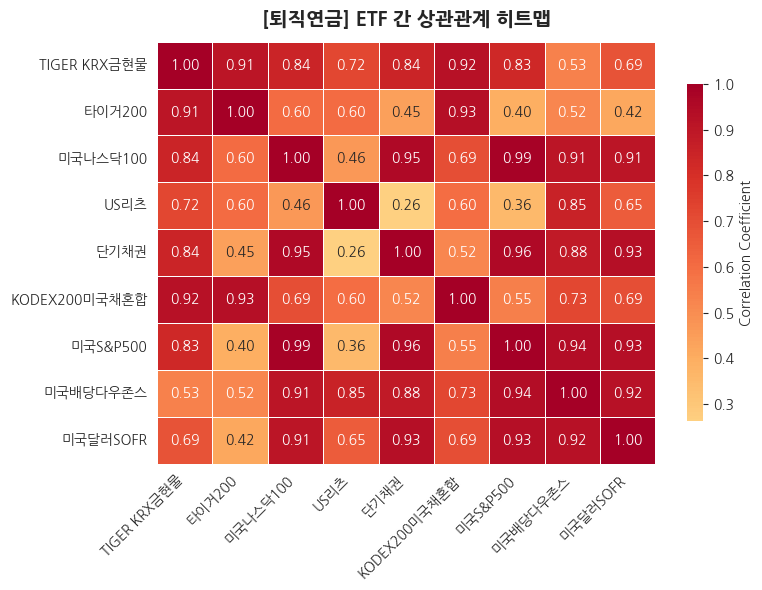

In [3]:
corr = data.corr()
# 히트맵 스타일 설정
plt.figure(figsize=(8,6))
#sns.set_theme(style="white")

# 색상맵과 폰트, 라벨 등 스타일링
sns.heatmap(
    corr,
    annot=True,              # 숫자 표시
    fmt=".2f",               # 소수점 자리수
    cmap="RdYlBu_r",         # 예쁜 색상맵
    center=0,                # 0 기준 색상 구분
    linewidths=0.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}
)

plt.title("[퇴직연금] ETF 간 상관관계 히트맵", fontsize=14, pad=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# ✅ 예시: 수익률 데이터프레임 (사용자 데이터로 대체 가능)
# df = 가격 데이터 (columns = 자산명)
# 수익률로 변환
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()
#print(df_log_return.head())

# 공분산 행렬 & 평균 수익률
cov_matrix = df_log_return.cov().values
mean_returns = df_log_return.mean().values

# 무위험 수익률
risk_free_rate = 0.035 / 252  # 일단위로 변환 (연 2% 가정) 252일이 보통 1년 내 거래일이기 때문

# 포트폴리오 변동성 함수
def portfolio_vol(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

# 포트폴리오 기대수익
def portfolio_return(weights, mean_returns):
    return np.sum(weights * mean_returns)

# 샤프비율 (최대화가 목표)
# 변동성(σ)은 “수익률이 얼마나 요동치는가” 즉, 위험(risk) 을 의미합니다.
# 따라서,
#	•	분자는 “얼마나 수익을 냈는가”
#	•	분모는 “그 수익을 내기 위해 얼마나 위험을 감수했는가”
# 즉,
# 단위 위험당 얼마의 초과 수익을 냈는가를 측정하는 지표가 바로 샤프비율입니다.
# **변동성이 낮으면서 샤프비율이 높은 것이 가장 좋은 지표**
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, mean_returns)
    port_vol = portfolio_vol(weights, cov_matrix)
    sharpe = (port_return - risk_free_rate) / port_vol
    return -sharpe  # minimize()는 최소화하므로 부호 반전

# 제약조건 (비중합 = 1)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 비중 범위 (숏 제한)
# 자산별 최소/최대 비중 설정
# 타이거 미국 나스닥100               7.00% 17.5
# SOL 미국배당다우존스	             12.50%  24
# 타이거 미국 S&P500	             10.50%  5
# 타이거 200	                    6.00%  8.42
# 타이거 KRX금현물	                10.00%  12
# 삼성 KODEX200 미국채혼합           29.00%  15.5
# 타이거 단기채권엑티브	                10.00% 11
# 타이거 미국MSCI리츠(합성H)           10.00%   0.5
# 타이거 미국달러SOFR금리액티브(합성)	    5.00%  6.07
### **퇴직연금**
dict_tickers = {"133690.KS": "미국나스닥100", "456610.KS": "미국달러SOFR", "446720.KS": "미국배당다우존스", "182480.KS": "US리츠",
                "102110.KS": "타이거200", "360750.KS": "미국S&P500", "272580.KS": "단기채권", "284430.KS": "KODEX200미국채혼합", "0072R0.KS": "TIGER KRX금현물"}
min_weights = [0.02, 0, 0.075, 0.005, 0.01, 0.055, 0.05, 0.24, 0.05]  # 한국채10년, MSCI, ...
max_weights = [0.12, 0.1, 0.175, 0.15, 0.11, 0.155, 0.15, 0.34, 0.15]
# min_weights = [0.07, 0.05, 0.125, 0.1, 0.06, 0.105, 0.1, 0.29, 0.1]  # 한국채10년, MSCI, ...
# max_weights = [0.07, 0.05, 0.125, 0.1, 0.06, 0.105, 0.1, 0.29, 0.1]
# min_weights = [0]*9  # 한국채10년, MSCI, ...
# max_weights = [1]*9
# bounds = tuple((0, 1) for _ in range(len(mean_returns)))
bounds = tuple((min_w, max_w) for min_w, max_w in zip(min_weights, max_weights))

# 초기값
initial_guess = np.repeat(1/len(mean_returns), len(mean_returns))

# 최적화
result = minimize(
    neg_sharpe_ratio,
    initial_guess,
    args=(mean_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 결과 출력
weights_opt = pd.Series(result.x, index=df_log_return.columns)
port_return = portfolio_return(result.x, mean_returns)
port_vol = portfolio_vol(result.x, cov_matrix)
sharpe = (port_return - risk_free_rate) / port_vol

print("===== 샤프비율 최대 포트폴리오 =====")
print(weights_opt*100)
print(f"\n기대수익률: {port_return*252:.2%}") ## 일단위를 연평균수익로 변경
print(f"변동성: {port_vol*np.sqrt(252):.2%}")
print(f"샤프비율: {sharpe*np.sqrt(252):.3f}")

===== 샤프비율 최대 포트폴리오 =====
TIGER KRX금현물     12.000000
타이거200            8.426977
미국나스닥100         17.500000
US리츠              0.500000
단기채권             11.000000
KODEX200미국채혼합    15.500000
미국S&P500          5.000000
미국배당다우존스         24.000000
미국달러SOFR          6.073023
dtype: float64

기대수익률: 39.40%
변동성: 5.27%
샤프비율: 6.814


In [26]:
import pandas as pd
import numpy as np

# 예시: etf별 일일 수익률
df_log_return = np.log(data / data.shift(1))
df_log_return = df_log_return.dropna()

# 포트폴리오 1 (중립형)
w1 = np.array([0.07, 0.05, 0.125, 0.1, 0.06, 0.105, 0.1, 0.29, 0.1])


# 포트폴리오 2 (샤프형)
w2 = np.array([0.175, 0.0607, 0.24, 0.005, 0.0842, 0.05, 0.11, 0.155, 0.12])

# 각 포트폴리오의 일자별 수익률 계산
p1_returns = df_log_return.dot(w1)
p2_returns = df_log_return.dot(w2)

# 두 포트폴리오 간 상관계수
corr = np.corrcoef(p1_returns, p2_returns)[0, 1]
print("두 포트폴리오 상관계수:", corr)

두 포트폴리오 상관계수: 0.8514261847890021


In [4]:
import numpy as np

def optimal_mix_portfolio(
    ret1, vol1, ret2, vol2, corr, rf=0.035, period=1
):
    """
    두 포트폴리오(예: 중립형, 샤프형)를 혼합할 때
    샤프비율이 최대가 되는 비중을 계산

    Parameters:
        ret1, ret2: 각 포트폴리오의 기대수익률 (% 단위 X, 비율 단위)
        vol1, vol2: 각 포트폴리오의 변동성
        corr: 두 포트폴리오 간 상관계수
        rf: 무위험 수익률 (default 0.035)
        period: 연환산 기간 (ex. 12개월 or 252일 등)

    Returns:
        w_opt: 포트폴리오2(샤프형)의 최적 비중
        ret_opt, vol_opt, sharpe_opt: 혼합포트폴리오의 성과
    """

    cov = corr * vol1 * vol2  # 공분산

    # 샤프비율을 최대화하는 비중 w (포트폴리오2의 비중)
    w_opt = ((ret2 - rf) * (vol1**2 - cov) - (ret1 - rf) * (cov - vol2**2)) / (
        (ret2 - rf) * (vol1**2 + vol2**2 - 2 * cov)
    )

    # 0~1 범위로 제한
    w_opt = np.clip(w_opt, 0, 1)

    # 혼합 포트폴리오 성과 계산
    ret_opt = w_opt * ret2 + (1 - w_opt) * ret1
    vol_opt = np.sqrt(
        (w_opt**2) * vol2**2 + ((1 - w_opt)**2) * vol1**2 + 2 * w_opt * (1 - w_opt) * cov
    )
    sharpe_opt = (ret_opt - rf) / vol_opt

    return w_opt, ret_opt, vol_opt, sharpe_opt


# === 예시 입력 (네가 준 값 기준) ===
ret1, vol1 = 0.3298, 0.0567   # 중립형
ret2, vol2 = 0.394, 0.0527    # 샤프형
corr = 0.85                  # 두 포트폴리오 간 상관관계 (추정치)
rf = 0.035                    # 무위험수익률

w_opt, ret_opt, vol_opt, sharpe_opt = optimal_mix_portfolio(
    ret1, vol1, ret2, vol2, corr, rf
)

print(f"샤프형 비중: {w_opt*100:.1f}%")
print(f"기대수익률: {ret_opt*100:.2f}%")
print(f"변동성: {vol_opt*100:.2f}%")
print(f"샤프비율: {sharpe_opt:.3f}")

샤프형 비중: 95.3%
기대수익률: 39.10%
변동성: 5.25%
샤프비율: 6.780


In [8]:
# 포트폴리오 1 (중립형)
w1 = np.array([0.07, 0.05, 0.125, 0.1, 0.06, 0.105, 0.1, 0.29, 0.1]) * 0.047

# 포트폴리오 2 (샤프형)
w2 = np.array([0.175, 0.0607, 0.24, 0.005, 0.0842, 0.05, 0.11, 0.155, 0.12]) * 0.953

mixed_w = w1 + w2
mixed_w * 100, dict_tickers.values()

(array([17.0065 ,  6.01971, 23.4595 ,  0.9465 ,  8.30626,  5.2585 ,
        10.953  , 16.1345 , 11.906  ]),
 dict_values(['미국나스닥100', '미국달러SOFR', '미국배당다우존스', 'US리츠', '타이거200', '미국S&P500', '단기채권', 'KODEX200미국채혼합', 'TIGER KRX금현물']))

In [11]:
# import numpy as np
# import pandas as pd
# import itertools
#
# # df_return : 8개 ETF 일간 수익률 데이터프레임
# returns = np.log(data / data.shift(1))
# mean_returns = returns.mean() * 252
# cov_matrix = returns.cov() * 252
# risk_free_rate = 0.035  # 연 3.5% 가정
#
# # step 0.1, 가능한 비중 값
# weights_space = np.arange(0.05, 1.01, 0.1)
#
#
# # 8자산 가능한 모든 조합
# all_combinations = list(itertools.product(weights_space, repeat=9))
#
# # # 합이 1인 조합만 필터
# valid_combinations = [w for w in all_combinations if np.isclose(sum(w), 1)]
# print(f"총 유효 조합 수: {len(valid_combinations)}")  # 확인
#
# results = []
#
# for w in valid_combinations:
#     w = np.array(w)
#     port_return = np.dot(w, mean_returns)
#     port_vol = np.sqrt(w.T @ cov_matrix @ w)
#     sharpe = (port_return - risk_free_rate) / port_vol
#     results.append({
#         'weights': w,
#         'return': port_return,
#         'vol': port_vol,
#         'sharpe': sharpe
#     })
#
# # 데이터프레임으로 정리
# df_results = pd.DataFrame(results)
#
# # 샤프 최대 포트폴리오
# best_idx = df_results['sharpe'].idxmax()
# best_port = df_results.loc[best_idx]
#
# print("===== Grid Search 최적 샤프 포트폴리오 =====")
# print(f"샤프비율: {best_port['sharpe']:.3f}")
# print(f"기대수익률: {best_port['return']*100:.2f}%")
# print(f"변동성: {best_port['vol']*100:.2f}%")
# print(f"포트폴리오 비중: {best_port['weights']}")